In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv('/content/train.csv')
dft = pd.read_csv('/content/test.csv')
sub=pd.read_csv('/content/sample_submission.csv')

In [3]:
df.shape

(100000, 52)

In [4]:
dft.shape

(50000, 51)

In [5]:
df.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target'],
      dtype='object')

In [6]:
dft.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49'],
      dtype='object')

In [7]:
df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-null  int64
 19  feature_18  50000 non-null  int64
 20  feature_19  50000 non-null  

In [10]:
df.isnull().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
target        0
dtype: int64

In [11]:
dft.isnull().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
dtype: int64

In [12]:
df.drop(columns=['id'],inplace=True)

In [50]:
dft.drop(columns=['id'],inplace=True)

In [51]:
prediction_data=dft

#### Exploratory Data Analysis

###### Train

In [14]:
for col in df.columns:
    print(df[col].value_counts())

0     88473
1      5632
2      2536
3      1292
4       760
5       545
6       291
7       199
8       170
9        81
10       21
Name: feature_0, dtype: int64
0     89014
1      4924
2      1838
3       783
4       501
5       369
6       359
7       333
8       328
9       261
10      214
11      162
13      145
12      122
14      113
15       98
16       89
17       70
18       47
19       42
21       37
20       32
22       25
23       24
25       17
24       16
27       13
26       12
28        6
29        5
31        1
Name: feature_1, dtype: int64
0    93492
1     3889
2     1306
3      610
4      442
5      252
6        9
Name: feature_2, dtype: int64
0     78107
1     10882
2      4664
3      2144
4      1076
5       648
6       557
7       372
8       253
9       226
10      207
11      162
12      124
13       95
14       87
16       76
15       75
17       63
18       44
19       42
20       33
22       24
21       17
24       10
23        9
26        3
Name: feature_3, 

###### Test

In [15]:
for col in dft.columns:
    print(dft[col].value_counts())

0     44229
1      2836
2      1267
3       641
4       413
5       281
7       112
6       109
8        73
9        31
10        8
Name: feature_0, dtype: int64
0     44394
1      2484
2       961
3       384
4       270
6       192
7       184
5       181
8       149
9       119
10       98
12       86
13       84
11       78
14       72
15       64
18       35
16       33
17       26
19       22
20       17
21       11
22        9
23        9
25        9
26        8
24        6
28        6
27        3
29        3
30        2
31        1
Name: feature_1, dtype: int64
0    46679
1     1967
2      675
3      341
4      200
5      132
6        6
Name: feature_2, dtype: int64
0     39007
1      5538
2      2303
3      1063
4       550
5       334
6       250
7       187
8       146
9       118
10      104
11       77
12       50
13       47
15       40
14       39
17       33
16       25
19       25
18       20
21       16
20       11
22       10
23        5
24        1
25        1
Name:

In [16]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [17]:
y

0        Class_2
1        Class_1
2        Class_1
3        Class_4
4        Class_2
          ...   
99995    Class_1
99996    Class_2
99997    Class_3
99998    Class_2
99999    Class_3
Name: target, Length: 100000, dtype: object

In [18]:
y1=np.ravel(y)
y1

array(['Class_2', 'Class_1', 'Class_1', ..., 'Class_3', 'Class_2',
       'Class_3'], dtype=object)

In [19]:
label = LabelEncoder()
y = label.fit_transform(y)

In [20]:
y

array([1, 0, 0, ..., 2, 1, 2])

##### SPLITING DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 50)

In [22]:
skfold=StratifiedKFold(n_splits=5)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [39]:
from sklearn.svm import SVC

clf_svc = SVC(random_state=0, max_iter=1000,C=10,kernel = 'rbf', gamma =0.1,probability=True)


#svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
    
clf_svc.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=1000, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
y_pred=clf_svc.predict(X_test)

In [41]:
cm=confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[ 274, 1297,   75,   53],
       [2063, 8672,  489,  353],
       [ 693, 3280,  148,  119],
       [ 460, 1772,  113,  139]])

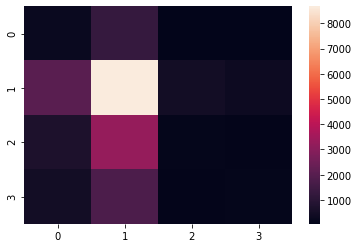

In [32]:
sns.heatmap(cm)
#x_label='Predicted',y_label='Original'

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
acc

0.46165

In [ ]:

clf_svc.score(X_train, y_train)
clf_svc.score(X_test, y_test)

In [52]:
predict_probability=clf_svc.predict_proba(prediction_data)

In [54]:
sub.iloc[:,1:5] = predict_probability
sub

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.090279,0.533962,0.203371,0.172389
1,100001,0.090279,0.533960,0.203371,0.172390
2,100002,0.090279,0.533960,0.203371,0.172390
3,100003,0.090279,0.533960,0.203371,0.172390
4,100004,0.090280,0.533914,0.203386,0.172420
...,...,...,...,...,...
49995,149995,0.090279,0.533960,0.203371,0.172390
49996,149996,0.090279,0.533960,0.203371,0.172390
49997,149997,0.090279,0.533960,0.203371,0.172390
49998,149998,0.090294,0.533797,0.203389,0.172521


In [56]:
sub.to_csv('sample_submission_1.csv',index=False)